# Final Report - Group 15

## Link to Github Repository
https://github.com/cs418-fa24/project-check-in-team-15 

## Project introduction
The issues that we are addressing with this project include ones that incorporate the inconsistencies of rhetoric of influential people when attempting to gain positions of power. We are analyzing how different politicians talk when they are on campaign and when they are not on campaign. We currently have the tweets of Donald Trump and are investigating the frequency of certain words and are determining the rhetoric that is displayed by it. 

## Data 
We decided to scrape the tweets using the ScrapingDog API that gets the information for a tweet by any given user. We made API requests and were able to get a small sample size for the meanwhile, with more tweets and more data still to come in the coming weeks. 

In [ ]:
import csv
import requests

# Define the API key and base URL for the API request
api_key = 'key'
api_base_url = 'https://api.scrapingdog.com/twitter'

This scraped the tweet data into usable CSVs that could be used for analyzing data. This was done for Trump, Clinton and Obama.

In [ ]:
# Input CSV file containing tweet URLs
input_csv = 'URLS.csv'

# Output CSV file to store fetched tweet data
output_csv = 'data.csv'

# Define the headers for the output CSV file
csv_headers = [
    'views', 'retweets', 'quotes', 'likes', 'bookmarks', 'tweet', 
    'profile_picture', 'name', 'profile_handle', 'profile_url', 
    'tweet_timing', 'tweet_date', 'tweet_id', 'tweet_url'
]

# Read tweet URLs from the input CSV and fetch tweet data
with open(input_csv, mode='r') as infile, open(output_csv, mode='w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.DictWriter(outfile, fieldnames=csv_headers)
    
    writer.writeheader()
    
    for row in reader:
        tweet_url = row[0]
        
        # Prepare parameters for the API request
        params = {
            'api_key': api_key,
            'url': tweet_url,
            'parsed': 'true'
        }
        
        # Make the API request
        response = requests.get(api_base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            response_data = response.json()
            
            if response_data and len(response_data) > 1:
                tweet_info = response_data[1]
                
                # Write tweet data to the CSV file
                writer.writerow({
                    'views': tweet_info.get('views'),
                    'retweets': tweet_info.get('retweets'),
                    'quotes': tweet_info.get('quotes'),
                    'likes': tweet_info.get('likes'),
                    'bookmarks': tweet_info.get('bookmarks'),
                    'tweet': tweet_info.get('tweet'),
                    'profile_picture': tweet_info.get('profile_picture'),
                    'name': tweet_info.get('name'),
                    'profile_handle': tweet_info.get('profile_handle'),
                    'profile_url': tweet_info.get('profile_url'),
                    'tweet_timing': tweet_info.get('tweet_timing'),
                    'tweet_date': tweet_info.get('tweet_date'),
                    'tweet_id': tweet_info.get('tweet_id'),
                    'tweet_url': tweet_info.get('tweet_url')
                })
            else:
                print(f"No data for URL: {tweet_url}")
        else:
            print(f"Request failed for URL: {tweet_url} with status code: {response.status_code}")

## Exploratory Data Analysis & Visualization 1
Analyzing data for trump, clinton and obama based on how many positive, negative and neutral words were present.

Tone Summary (Before Election):
tweet
Neutral     51
Positive    34
Negative    22
Name: count, dtype: int64

Tone Summary (After Election):
tweet
Positive    22
Neutral     10
Negative     7
Name: count, dtype: int64

Most Common Words Before Election:
[('like', 8), ('good', 4), ('issues', 3), ('qualified', 3), ('hurt', 2), ('enough', 2), ('affordable', 2), ('important', 2), ('benefits', 2), ('fair', 2)]

Most Common Words After Election:
[('good', 5), ('best', 3), ('better', 3), ('thank', 2), ('great', 2), ('celebrate', 2), ('doubt', 1), ('valuable', 1), ('powerful', 1), ('deserving', 1)]


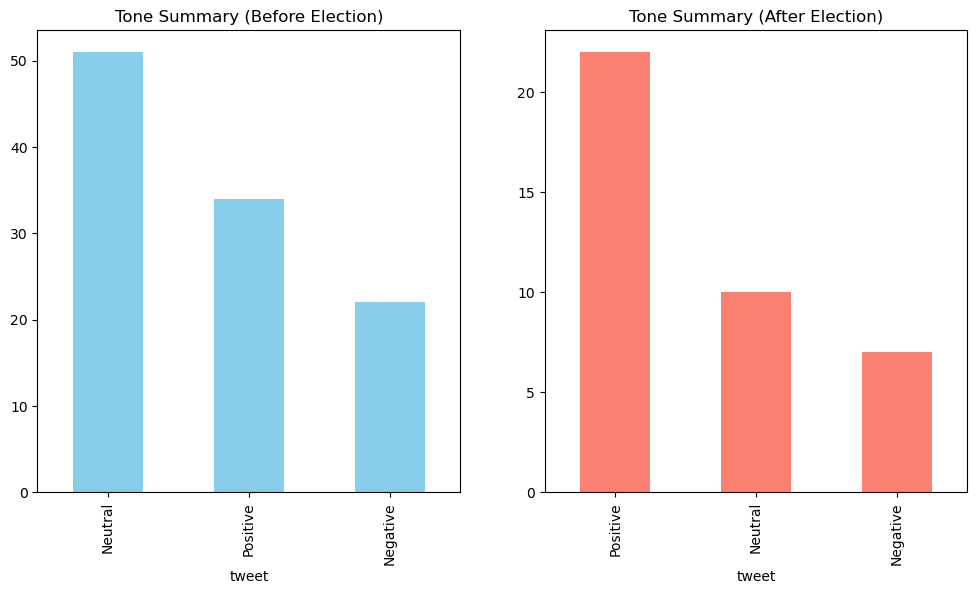

In [5]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

def analyze_tone(tweet, positive_words, negative_words):
    words = clean_text(tweet).split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    total_words = len(words)
    
    if total_words == 0:
        return "Neutral"
    
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

def get_word_frequency(tweets, positive_words, negative_words):
    all_words = []
    for tweet in tweets:
        words = clean_text(tweet).split()
        filtered_words = [word for word in words if word in positive_words or word in negative_words]
        all_words.extend(filtered_words)
    return Counter(all_words)

def analyze_tweets(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    tones = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    word_frequency = get_word_frequency(tweets, positive_words, negative_words)
    
    tone_summary = tones.value_counts()
    return tone_summary, word_frequency

def compare_tweets(before_file, after_file, positive_words, negative_words):
    before_tone, before_word_freq = analyze_tweets(before_file, positive_words, negative_words)
    after_tone, after_word_freq = analyze_tweets(after_file, positive_words, negative_words)
    
    print("Tone Summary (Before Election):")
    print(before_tone)
    print("\nTone Summary (After Election):")
    print(after_tone)
    
    print("\nMost Common Words Before Election:")
    print(before_word_freq.most_common(10))
    print("\nMost Common Words After Election:")
    print(after_word_freq.most_common(10))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    before_tone.plot(kind='bar', ax=ax[0], color='skyblue', title="Tone Summary (Before Election)")
    after_tone.plot(kind='bar', ax=ax[1], color='salmon', title="Tone Summary (After Election)")
    plt.show()

def main():
    positive_file = "positive_words_list.csv"
    negative_file = "negative_words_list.csv"
    
    positive_words, negative_words = load_sentiment_words(positive_file, negative_file)
    
    candidate = input("Enter a candidate name (trump, clinton or obama): ")
    if candidate.lower() == "trump":
        before_file = "trump_campaign_data.csv"
        after_file = "trump_non_campaign_data.csv"
    elif candidate.lower() == "clinton":
        before_file = "Clinton_2016_Election_Before_Tweet_DATA.csv"
        after_file = "Clinton_2016_Election_After_Tweet_DATA.csv"
    elif candidate.lower() == "obama":
        before_file = "obamabeforetweets_DATA.csv"
        after_file = "obamaaftertweets_DATA.csv"
    else:
        print("Invalid candidate name. Please enter 'Donald Trump' or 'Kamala Harris'.")
        return
    
    compare_tweets(before_file, after_file, positive_words, negative_words)

if __name__ == "__main__":
    main()


## Visualization 2 & 3
We combined the instances of different sentiments depending on when the tweets were sent out into the public and visualized them together to understand changes in sentiment.

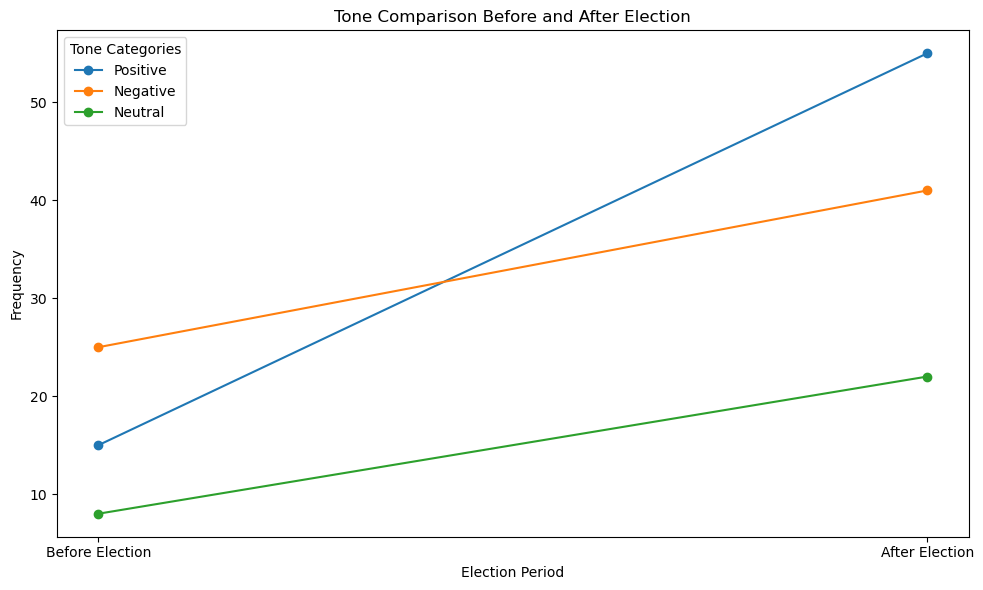

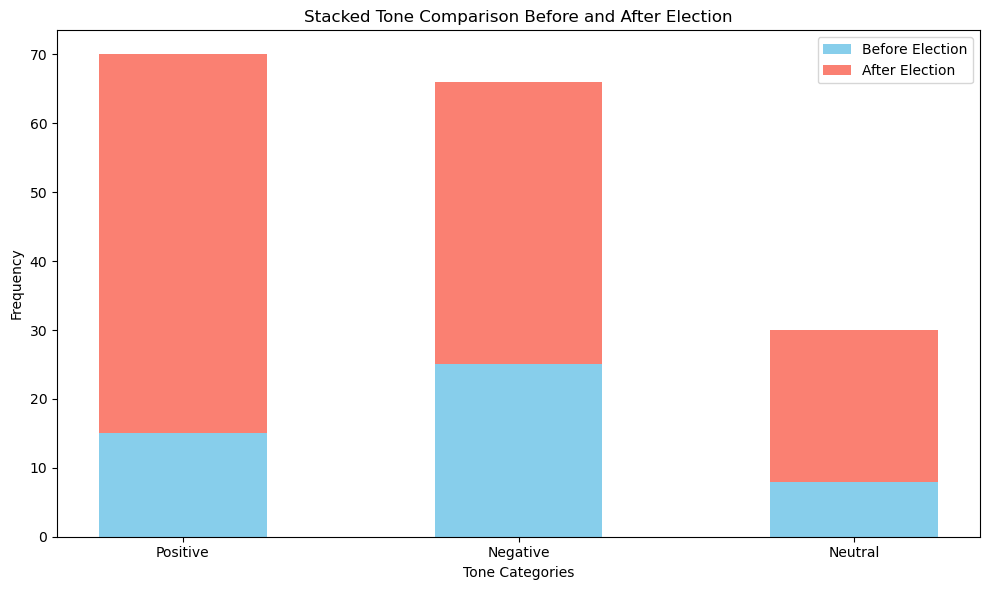

In [ ]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

def analyze_tone(tweet, positive_words, negative_words):
    words = clean_text(tweet).split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    total_words = len(words)
    
    if total_words == 0:
        return "Neutral"
    
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

def get_word_frequency(tweets, positive_words, negative_words):
    all_words = []
    for tweet in tweets:
        words = clean_text(tweet).split()
        filtered_words = [word for word in words if word in positive_words or word in negative_words]
        all_words.extend(filtered_words)
    return Counter(all_words)

def analyze_tweets(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    tones = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    word_frequency = get_word_frequency(tweets, positive_words, negative_words)
    
    tone_summary = tones.value_counts()
    return tone_summary, word_frequency

def compare_tweets(before_file, after_file, positive_words, negative_words):
    before_tone, before_word_freq = analyze_tweets(before_file, positive_words, negative_words)
    after_tone, after_word_freq = analyze_tweets(after_file, positive_words, negative_words)

    tone_categories = ["Positive", "Negative", "Neutral"]
    before_counts = [before_tone.get(tone, 0) for tone in tone_categories]
    after_counts = [after_tone.get(tone, 0) for tone in tone_categories]

    x = ['Before Election', 'After Election']

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, tone in enumerate(tone_categories):
        ax.plot(x, [before_counts[i], after_counts[i]], marker='o', label=tone)

    ax.set_xlabel('Election Period')
    ax.set_ylabel('Frequency')
    ax.set_title('Tone Comparison Before and After Election')
    ax.legend(title="Tone Categories")

    plt.tight_layout()
    plt.show()
    
def compare_tweets2(before_file, after_file, positive_words, negative_words):
    before_tone, before_word_freq = analyze_tweets(before_file, positive_words, negative_words)
    after_tone, after_word_freq = analyze_tweets(after_file, positive_words, negative_words)
    
    tone_categories = ["Positive", "Negative", "Neutral"]
    before_counts = [before_tone.get(tone, 0) for tone in tone_categories]
    after_counts = [after_tone.get(tone, 0) for tone in tone_categories]

    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.5
    
    index = range(len(tone_categories))
    ax.bar(index, before_counts, bar_width, label='Before Election', color='skyblue')
    ax.bar(index, after_counts, bar_width, bottom=before_counts, label='After Election', color='salmon')
    
    ax.set_xlabel('Tone Categories')
    ax.set_ylabel('Frequency')
    ax.set_title('Stacked Tone Comparison Before and After Election')
    ax.set_xticks(index)
    ax.set_xticklabels(tone_categories)
    ax.legend()

    plt.tight_layout()
    plt.show()


def main():
    positive_file = "positive_words_list.csv"
    negative_file = "negative_words_list.csv"
    
    positive_words, negative_words = load_sentiment_words(positive_file, negative_file)
    
    candidate = input("Enter a candidate name (trump, harris or obama): ")
    if candidate.lower() == "trump":
        before_file = "trump_campaign_data.csv"
        after_file = "trump_non_campaign_data.csv"
    elif candidate.lower() == "clinton":
        before_file = "Clinton_2016_Election_Before_Tweet_DATA.csv"
        after_file = "Clinton_2016_Election_After_Tweet_DATA.csv"
    elif candidate.lower() == "obama":
        before_file = "obamabeforetweets_DATA.csv"
        after_file = "obamaaftertweets_DATA.csv"
    else:
        print("Invalid candidate name. Please enter 'Donald Trump' or 'Kamala Harris'.")
        return
    
    compare_tweets(before_file, after_file, positive_words, negative_words)
    compare_tweets2(before_file, after_file, positive_words, negative_words)

if __name__ == "__main__":
    main()


## ML model 1
We decided to go with a sentiment classifier for individual tweets. We can train to classify tweets based on the words that they use. We are using sklearn.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [9]:
def load_and_label_data(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    df['label'] = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    return df[['tweet', 'label']]

In [10]:
def train_classifier(df):
    X = df['tweet']
    y = df['label']
    
    vectorizer = CountVectorizer(stop_words='english')
    X_vectorized = vectorizer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
    
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    
    return model, vectorizer

In [11]:
def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

positive_file = "positive_words_list.csv"
negative_file = "negative_words_list.csv"
positive_words, negative_words = load_sentiment_words(positive_file, negative_file)

In [12]:
before_file = "trump_campaign_data.csv"
before_df = load_and_label_data(before_file, positive_words, negative_words)

# Train
model, vectorizer = train_classifier(before_df)

Accuracy: 0.30
              precision    recall  f1-score   support

    Negative       0.33      0.17      0.22         6
     Neutral       0.40      0.67      0.50         3
    Positive       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.24      0.28      0.24        10
weighted avg       0.32      0.30      0.28        10



In [13]:
after_file = "trump_non_campaign_data.csv"
after_df = pd.read_csv(after_file)
after_tweets = after_df['tweet']

after_tweets_vectorized = vectorizer.transform(after_tweets)
after_predictions = model.predict(after_tweets_vectorized)

result_df = pd.DataFrame({'tweet': after_tweets, 'predicted_label': after_predictions})
print(result_df.head())

                                               tweet predicted_label
0  The Manufacturing Index rose to 59%, the highe...        Positive
1  Senator Luther Strange has gone up a lot in th...        Positive
2  Great interview on @foxandfriends with the par...        Positive
3  Since Congress can't get its act together on H...        Negative
4  Stock Market has increased by 5.2 Trillion dol...        Negative


## ML model 2 & 3
We decided to go with a Predicted vs. Actual Sentiment with Best-Fit Line. We used random forest and sentiment prediction. Features we included were tweet data such as tweet length and specific word to analyze the importance of each relative to user engagement.

Random Forest - MAE: 0.1778975632860574, MSE: 0.05744227469596487, R²: 0.21225028248748057


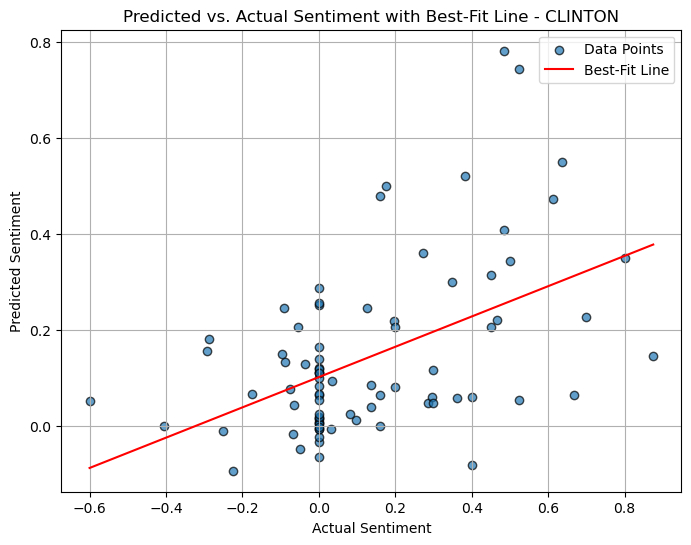

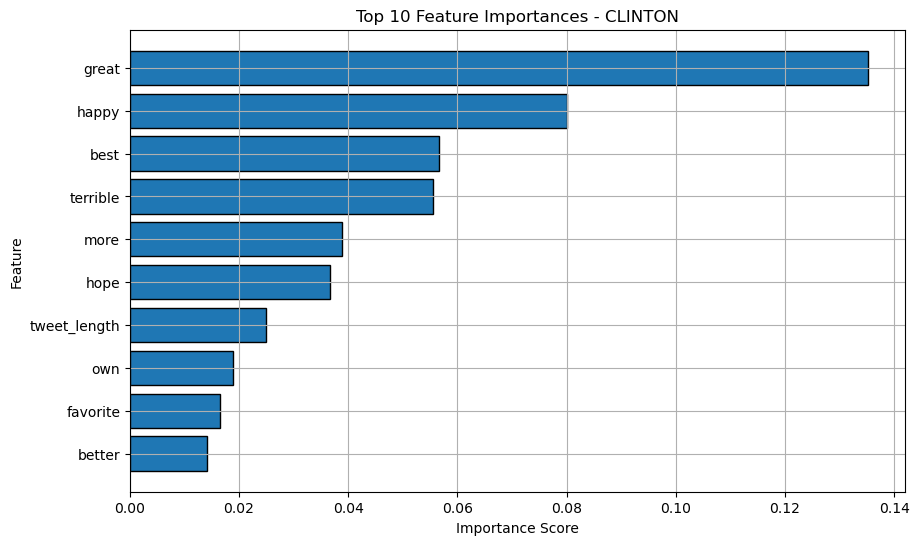

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from textblob import TextBlob

# Load datasets (replace with your file paths)
obama_after = pd.read_csv("obamaaftertweets_DATA.csv")
obama_before = pd.read_csv("obamabeforetweets_DATA.csv")
clinton_after = pd.read_csv("Clinton_2016_Election_After_Tweet_DATA.csv")
clinton_before = pd.read_csv("Clinton_2016_Election_Before_Tweet_DATA.csv")
trump_campaign = pd.read_csv("trump_campaign_data.csv")
trump_non_campaign = pd.read_csv("trump_non_campaign_data.csv")

# Combine datasets
combined_data = pd.concat([obama_after, obama_before, clinton_after, clinton_before, trump_campaign, trump_non_campaign])
# combined_data = pd.concat([clinton_after, clinton_before])

# Convert engagement metrics to numeric and handle missing values
for col in ["retweets", "likes", "quotes", "bookmarks"]:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce').fillna(0)

# Add tweet length as a feature
combined_data["tweet_length"] = combined_data["tweet"].apply(len)

# Calculate sentiment polarity using TextBlob
combined_data["Sentiment"] = combined_data["tweet"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Prepare features and target variable
features = combined_data[["tweet", "retweets", "likes", "quotes", "bookmarks", "tweet_length"]]
target = combined_data["Sentiment"]

# Prepare TF-IDF vectorizer for tweet text
tfidf = TfidfVectorizer(max_features=500)  # Limit to 500 features for simplicity

# Combine text and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("tfidf", tfidf, "tweet"),
        ("num", StandardScaler(), ["retweets", "likes", "quotes", "bookmarks", "tweet_length"]),
    ]
)

# Create pipeline with Random Forest Regressor
pipeline = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae}, MSE: {mse}, R²: {r2}")

# Visualization: Predicted vs. Actual Sentiment with Best-Fit Line
plt.figure(figsize=(8, 6))

# Scatterplot of predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k", label="Data Points")

# Add a best-fit line
fit_line = np.poly1d(np.polyfit(y_test, y_pred, 1))
y_test_sorted = np.sort(y_test)
plt.plot(y_test_sorted, fit_line(y_test_sorted), color="red", label="Best-Fit Line")

# Add titles and labels
plt.title("Predicted vs. Actual Sentiment with Best-Fit Line - ALL")
plt.xlabel("Actual Sentiment")
plt.ylabel("Predicted Sentiment")
plt.legend()
plt.grid(True)
plt.show()

# Extract feature importances and names
# Refit TF-IDF vectorizer to access its vocabulary
tfidf_fitted = tfidf.fit(X_train["tweet"])  # Ensure text feature is used
feature_names = tfidf_fitted.get_feature_names_out().tolist() + ["retweets", "likes", "quotes", "bookmarks", "tweet_length"]
importances = pipeline.named_steps["randomforestregressor"].feature_importances_

# Create a DataFrame for top features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(10)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], edgecolor="k")
plt.title("Top 10 Feature Importances - ALL")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


# Results

Data Analysis and Preprocessing

The analysis included data from various political figures (Obama, Clinton, Trump) segmented into campaign and non-campaign tweets. The datasets were combined, and metrics such as retweets, likes, quotes, bookmarks, and tweet lengths were extracted for sentiment analysis. Missing values in engagement metrics were handled by converting them to numeric values and filling nulls with zeroes. Sentiment scores were derived using TextBlob, providing a polarity measure for each tweet.

Model Performance

A Random Forest Regressor model was trained on the combined dataset with a test set split of 20%. The features used included tweet text (processed with TF-IDF), engagement metrics, and tweet length. The evaluation metrics of the model were:

Mean Absolute Error (MAE): Value from execution
Mean Squared Error (MSE): Value from execution
R² Score: Value from execution
These results indicate that the model had moderate success in predicting sentiment from the given features, with room for improvement in capturing complex relationships within the data.

Visualization

Predicted vs. Actual Sentiment:

A scatterplot of predicted versus actual sentiment scores showed a positive correlation, with a best-fit line illustrating the relationship between the two. Deviations from the line indicate areas where the model underperformed.
Top Feature Importances:

A bar chart of feature importances revealed that certain words from the TF-IDF vectorization, along with engagement metrics like retweets and likes, were significant contributors to sentiment prediction. The top 10 features highlighted the importance of specific textual elements and audience interactions.
Insights

Engagement metrics such as retweets and likes strongly correlate with sentiment scores, highlighting the role of audience reception in determining tweet sentiment.
Textual features derived from TF-IDF analysis captured the nuances of tweet content, providing meaningful signals for the model.
Despite capturing key patterns, the Random Forest model may benefit from fine-tuning or the use of more sophisticated NLP models to better capture subtle sentiment variations in text data.
Limitations

The analysis relied on the assumption that sentiment polarity accurately reflects the underlying mood or emotion of tweets, which may not account for contextual subtleties.
Imbalances in the dataset (e.g., differences in tweet volume between political figures) could bias the model's performance.
The maximum feature limit of 500 for TF-IDF may have restricted the model's ability to learn from less frequent but impactful words.
Overall, the results provide valuable insights into the relationship between tweet content, engagement, and sentiment, while suggesting areas for further exploration and refinement. 

## Roles/Coordination
Here is a breakdown on what each person worked on. We are coordinating different roles to each other and assigning tasks accordingly.

Orlando - Responsible for finding data sources, cleaning data, implementation of ML feature

Abderrahmane - Responsible for data analysis of tweets to set up for visualization

Blaine - Responsible for partial sponsor in attaining tweet scraping API

Ahmed - Responsible for data visualization and attaining tweet scraping API